In [23]:
#Plots, formats and normalizes the daily / monthly returns of a given index or stock and compares with FED FUNDs Rate (%)

import time, datetime
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.dates import YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange
import numpy as np

parent_dir = Path.cwd().parent.absolute()

csv_dir = parent_dir / 'csv'

todays_date = datetime.date.today()
ticker = '^GSPC'
#ticker = 'FMG.AX'
csv_file = ticker + '-yahoo-finance-' + str(todays_date) + '.csv'
csv_file_absolute = csv_dir / csv_file

print('\nparent_dir', parent_dir)
print('csv_dir', csv_dir)
print(f'csv_dir: {csv_dir}')

print('todays_date', todays_date)
print('ticker:', ticker)
print('csv_file', csv_file)
print('csv_file_absolute', csv_file_absolute, '\n')

def normalize_original(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

YEAR = 1986
MONTH = 1
DAY = 1

period1 = int(time.mktime(datetime.datetime(YEAR, MONTH, DAY, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.date.today().timetuple()))

interval = '1d' # 1wk, 1m

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

# treat query string as an api call
print('\nperiod1:', period1)
print('period2:', period2)
print('query_string:', query_string, '\n')

df = pd.read_csv(query_string)
df3 =  pd.read_csv("FEDFUNDS.csv")


parent_dir C:\Users
csv_dir C:\Users\csv
csv_dir: C:\Users\csv
todays_date 2022-02-06
ticker: ^GSPC
csv_file ^GSPC-yahoo-finance-2022-02-06.csv
csv_file_absolute C:\Users\csv\^GSPC-yahoo-finance-2022-02-06.csv 


period1: 504979140
period2: 1644076800
query_string: https://query1.finance.yahoo.com/v7/finance/download/^GSPC?period1=504979140&period2=1644076800&interval=1d&events=history&includeAdjustedClose=true 



In [24]:
df = df[['Date','Adj Close']]

In [25]:
df.rename(columns={'Date' : 'date', 'Adj Close' : 'price_t'}, inplace = True)

In [26]:
df['% returns'] = df['price_t'].pct_change(1)

In [27]:
df.set_index('date',inplace = True)

<AxesSubplot:xlabel='date'>

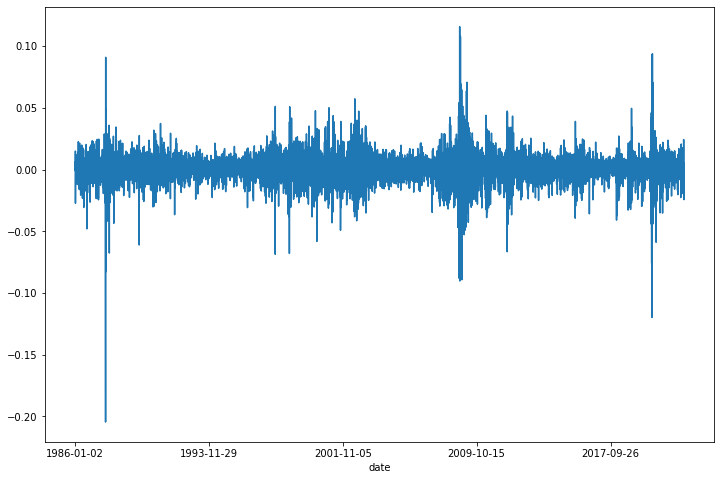

In [28]:
df['% returns'].plot(figsize=(12,8))

In [29]:
# df = df.reset_index(drop=True)
df = df.reset_index()
print(df.head())

         date     price_t  % returns
0  1986-01-02  209.589996        NaN
1  1986-01-03  210.880005   0.006155
2  1986-01-06  210.649994  -0.001091
3  1986-01-07  213.800003   0.014954
4  1986-01-08  207.970001  -0.027268


In [30]:
print(f'len(df): {len(df)}')
print(f'len(df3): {len(df3)}')

months = len(df) / 12
print(months)

len(df): 9099
len(df3): 433
758.25


In [31]:
print(df.head())

         date     price_t  % returns
0  1986-01-02  209.589996        NaN
1  1986-01-03  210.880005   0.006155
2  1986-01-06  210.649994  -0.001091
3  1986-01-07  213.800003   0.014954
4  1986-01-08  207.970001  -0.027268


In [32]:
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')
df3.head()

,date,fed_funds (%)
0,01/01/1986,8.14
1,01/02/1986,7.86
2,01/03/1986,7.48
3,01/04/1986,6.99
4,01/05/1986,6.85


In [33]:

df3['date'] =  pd.to_datetime(df3['date'], format='%d/%m/%Y')

In [34]:
result = pd.merge(df, df3, how="outer", on=["date"])
print(result.head())

        date     price_t  % returns  fed_funds (%)
0 1986-01-02  209.589996        NaN            NaN
1 1986-01-03  210.880005   0.006155            NaN
2 1986-01-06  210.649994  -0.001091            NaN
3 1986-01-07  213.800003   0.014954            NaN
4 1986-01-08  207.970001  -0.027268            NaN


In [35]:
result['date'] =  pd.to_datetime(result['date'], format='%Y-%m-%d')
result = result.sort_values(by=['date'])
result['price_t'] = result['price_t'].interpolate(method='linear')
result['% returns'] = result['% returns'].interpolate(method='linear')

In [36]:
#result.to_csv('poo.csv', index=False)
greater_than_3 = result['fed_funds (%)'] > 3
df9 = result[greater_than_3]

In [37]:
def normalize(df, feature_name):
    result = df.copy()
    max_value = df[feature_name].max()
    min_value = df[feature_name].min()
    result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [38]:
result = normalize(df=result, feature_name='% returns')
result = normalize(df=result, feature_name='price_t')
result = normalize(df=result, feature_name='fed_funds (%)')
print(result)

           date   price_t  % returns  fed_funds (%)
9099 1986-01-01       NaN        NaN        0.82551
0    1986-01-02  0.001328        NaN            NaN
1    1986-01-03  0.001609   0.657860            NaN
2    1986-01-06  0.001559   0.635251            NaN
3    1986-01-07  0.002245   0.685316            NaN
...         ...       ...        ...            ...
9094 2022-01-31  0.938819   0.697586            NaN
9095 2022-02-01  0.945566   0.660070            NaN
9096 2022-02-02  0.954893   0.668056            NaN
9097 2022-02-03  0.930521   0.562544            NaN
9098 2022-02-04  0.935548   0.654746            NaN

[9257 rows x 4 columns]


<AxesSubplot:xlabel='date'>

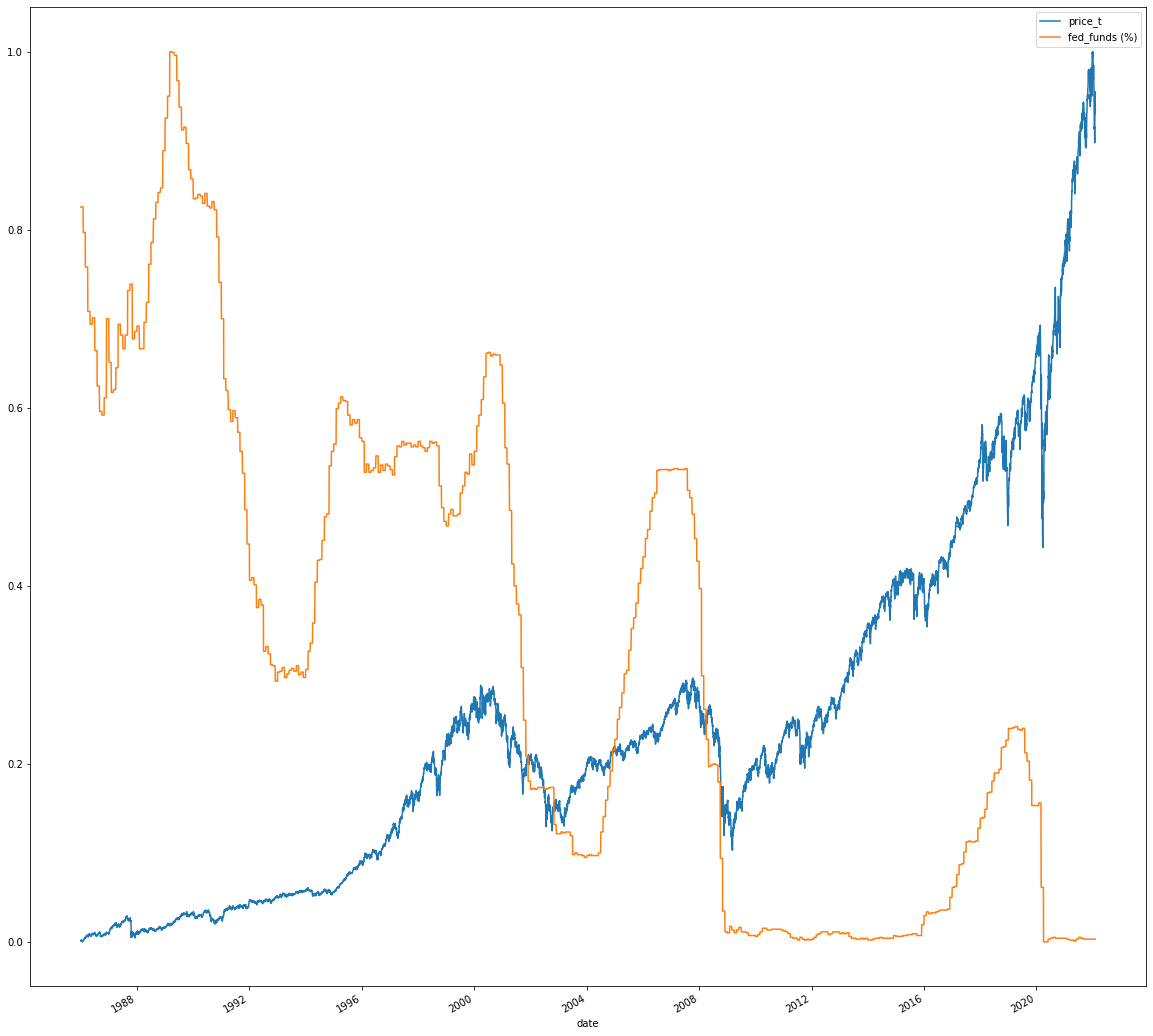

In [52]:
result['fed_funds (%)'] = result['fed_funds (%)'].fillna(method="ffill")
result.plot(x = 'date', y = ['price_t', 'fed_funds (%)'],figsize = (20,20))

<AxesSubplot:xlabel='date'>

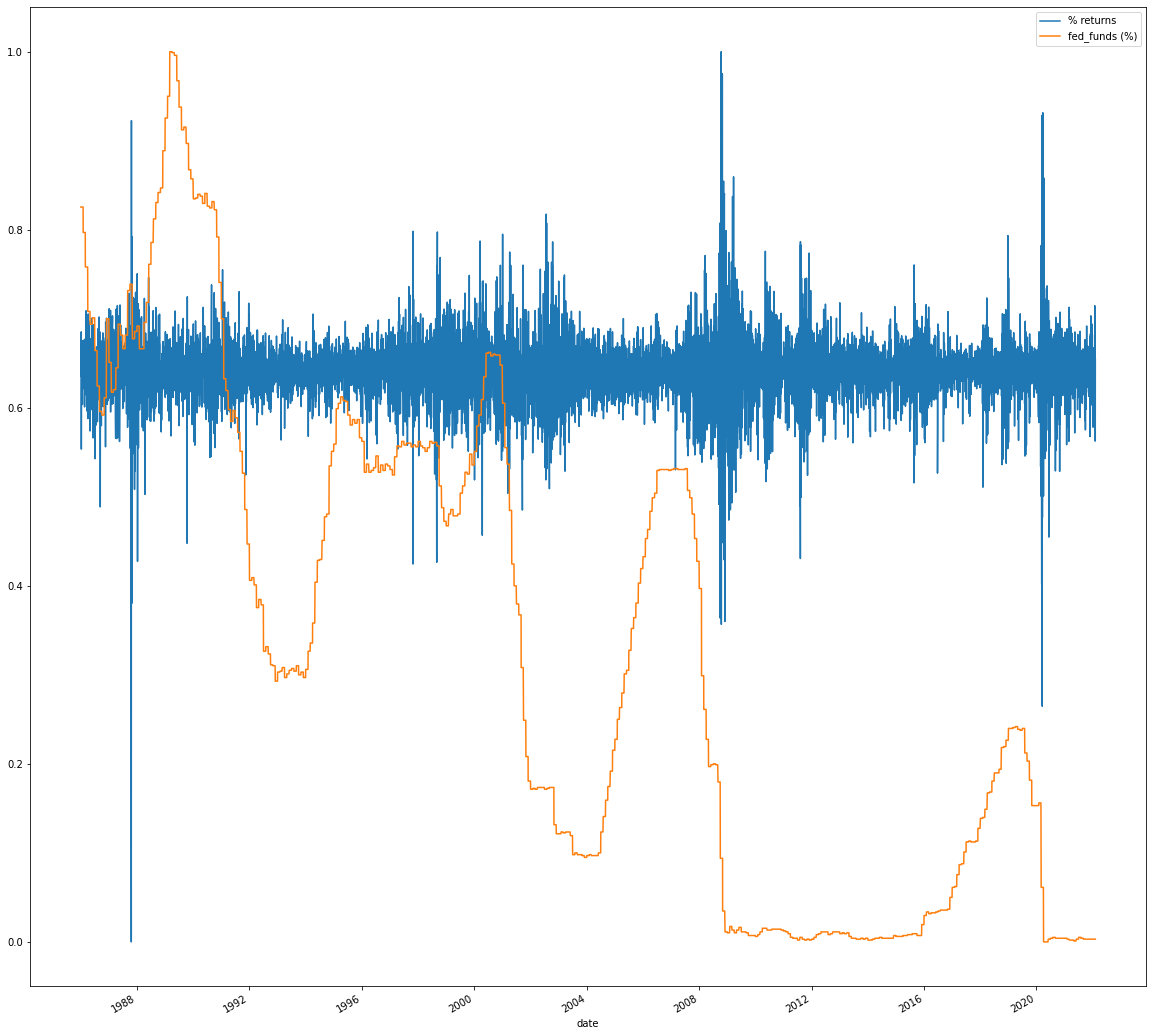

In [40]:
result.plot(x = 'date', y = ['% returns', 'fed_funds (%)'],figsize = (20,20))


In [41]:
print(f'df.shape: {df.shape}')
print(f'df3.shape: {df3.shape}')
print(f'result.shape: {result.shape}')


df.shape: (9099, 3)
df3.shape: (433, 2)
result.shape: (9257, 4)


0      8.14
1      7.86
2      7.48
3      6.99
4      6.85
       ... 
428    0.08
429    0.08
430    0.08
431    0.08
432    0.08
Name: fed_funds (%), Length: 433, dtype: float64

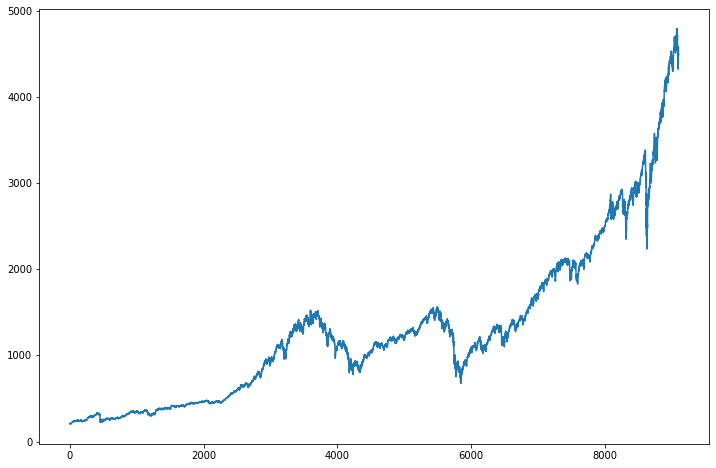

In [42]:
#Above calculates the % returns of any stock on yahoo. 
#Below Calculates Average historic returns. 
df['price_t'].plot(figsize=(12,8))
df3['fed_funds (%)']


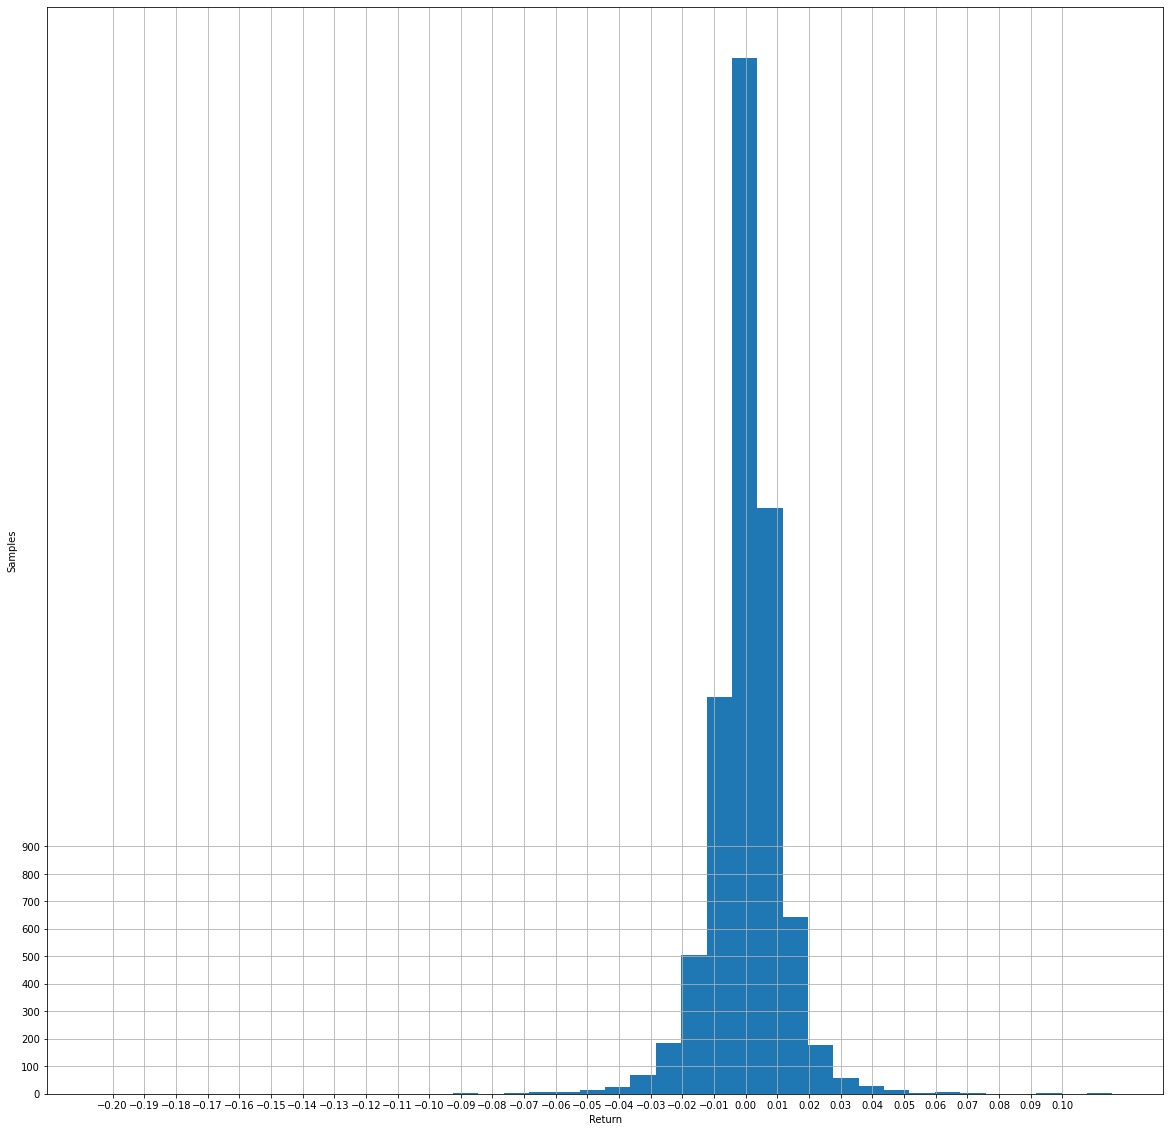

In [48]:
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(1, 1, 1)
df['% returns'].hist(bins=40, ax=ax1)
ax1.set_xticks(np.arange(-0.2,0.1,0.01))
ax1.set_yticks(np.arange(0,1000,100))
ax1.set_xlabel('Return')
ax1.set_ylabel('Samples')
#ax1.set_title('Return distribution'")
plt.show()

In [49]:
#Stats on % Daily Returns of Selected Ticker. 
df['% returns'].describe()

count    9098.000000
mean        0.000405
std         0.011585
min        -0.204669
25%        -0.004304
50%         0.000660
75%         0.005690
max         0.115800
Name: % returns, dtype: float64

In [ ]:
#Declare new DF for Annualized Expected Return (Average) 
df2 = df['% returns'].describe()
print("The Daily Expected Return is", df2.loc['mean'], "%")
daily = df2.loc['mean']

In [50]:
#Anualized Daily Expected Return Calculation is. 
Anualized_R_Simple = daily*250
Anualized_R_Compounded = ((1+daily)**250)-1

print("Anualized_R_Simple = ",Anualized_R_Simple*100,"%")
print("Anualized_R_Compounded",Anualized_R_Compounded*100, "%")

Anualized_R_Simple =  10.118785099295744 %
Anualized_R_Compounded 10.646182424600713 %


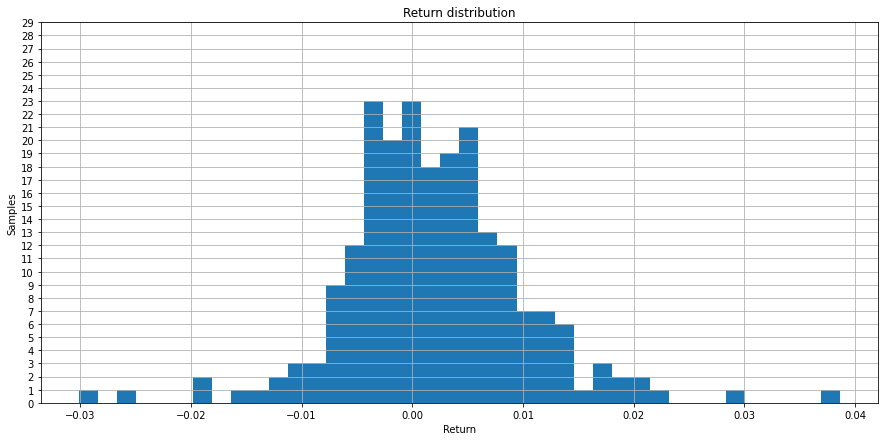

In [67]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
df9['% returns'].hist(bins=40, ax=ax1)
ax1.set_xlabel('Return')
ax1.set_yticks(range(0,30))

ax1.set_ylabel('Samples')
ax1.set_title('Return distribution')
plt.show()

In [55]:
df9['% returns'].describe()


count    215.000000
mean       0.001875
std        0.008226
min       -0.030108
25%       -0.002927
50%        0.001356
75%        0.006029
max        0.038630
Name: % returns, dtype: float64